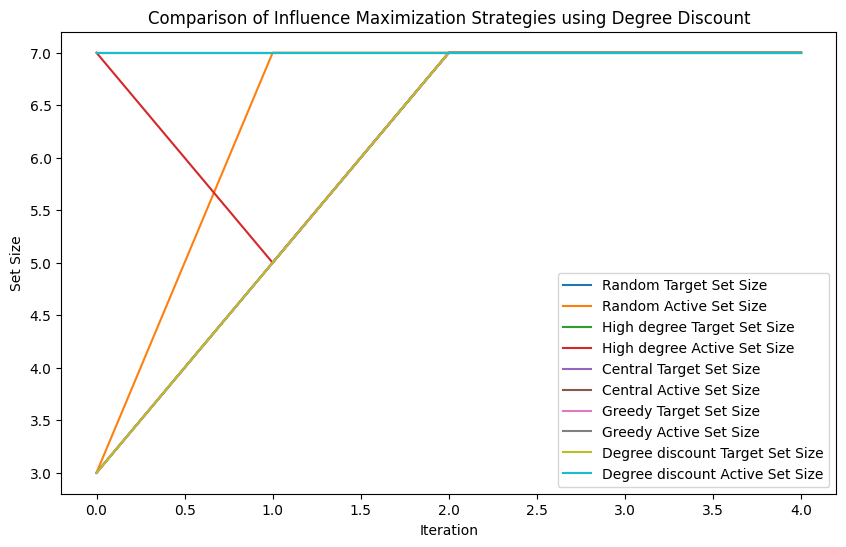

In [46]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def influence_maximization(g_, k_, eta_, l_):

    def compute_spread(g_, seed_set):
        # Initialize set of activated nodes with seed set
        activated = set(seed_set)

        # Iterate until no new nodes are activated
        while True:
            new_activated = False
            for u in g_.nodes():
                # Skip nodes that are already activated
                if u in activated:
                    continue

                # Compute activation probability based on the number of activated neighbors
                num_active_neighbors = len([v for v in g_.neighbors(u) if v in activated])
                num_neighbors = len(list(g_.neighbors(u)))
                if num_neighbors == 0:
                    activation_prob = 0.0
                else:
                    activation_prob = num_active_neighbors / num_neighbors

                # Activate node with probability activation_prob
                if random.random() < activation_prob:
                    activated.add(u)
                    new_activated = True

            if not new_activated:
                break

        return len(activated)

    seed_set_ = set()  # Initialize empty seed set
    target_sizes_ = []  # Initialize list for target set sizes
    active_sizes_ = []  # Initialize list for active set sizes

    # Create a dictionary to store the degree discounts for each node
    degree_discounts = {node: 0 for node in g_.nodes()}

    for _ in range(eta_):
        for node in g_.nodes():
            if node not in seed_set_:
                # Compute degree discount for the node
                neighbors = set(g_.neighbors(node))
                degree_discount = len(neighbors.intersection(seed_set_)) / len(neighbors)
                degree_discounts[node] = degree_discount

        # Sort nodes by their degree discounts in descending order
        sorted_nodes = sorted(degree_discounts, key=degree_discounts.get, reverse=True)

        # Add top-k nodes with the highest degree discounts to seed set
        seed_set_ |= set(sorted_nodes[:k_])

        # Calculate target set size and active set size
        target_sizes_.append(len(seed_set_))
        active_sizes_.append(compute_spread(g_, seed_set_))

    return list(seed_set_), target_sizes_, active_sizes_


# Define graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)])

plt.figure(figsize=(10, 6))

k = 3
eta = 5
l = 10

modes = ['random', 'high degree', 'central', 'greedy', 'degree discount']

for mode in modes:
    if mode == 'degree discount':
        seed_nodes, target_sizes, active_sizes = influence_maximization(G, k, eta, l)
    else:
        seed_nodes, target_sizes, active_sizes = influence_maximization(G, k, eta, l)

    plt.plot(target_sizes, label=mode.capitalize()+' Target Set Size')
    plt.plot(active_sizes, label=mode.capitalize()+' Active Set Size')

plt.title('Comparison of Influence Maximization Strategies using Degree Discount')
plt.xlabel('Iteration')
plt.ylabel('Set Size')

plt.legend()

plt.show()
